<a href="https://colab.research.google.com/github/Meder11/Portfolio/blob/main/laptop_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scraping products: 100%|██████████| 6/6 [00:00<00:00, 857.85it/s]


Saved raw data to data/raw_laptops.csv
Saved cleaned data to data/cleaned_laptops.csv

=== HEAD ===
            title price_raw  \
0  Packard 255 G2   $416.99   
1   Aspire E1-510   $306.99   
2  ThinkPad T540p  $1178.99   
3         ProBook   $739.99   
4   ThinkPad X240  $1311.99   

                                         description reviews_text  rating  \
0  15.6", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...         None       0   
1    15.6", Pentium N3520 2.16GHz, 4GB, 500GB, Linux         None       0   
2   15.6", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit         None       0   
3    14", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit         None       0   
4  12.5", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...         None       0   

     price  reviews_count  
0   416.99            NaN  
1   306.99            NaN  
2  1178.99            NaN  
3   739.99            NaN  
4  1311.99            NaN  

=== SUMMARY ===
                 title price_raw  \
count                6       

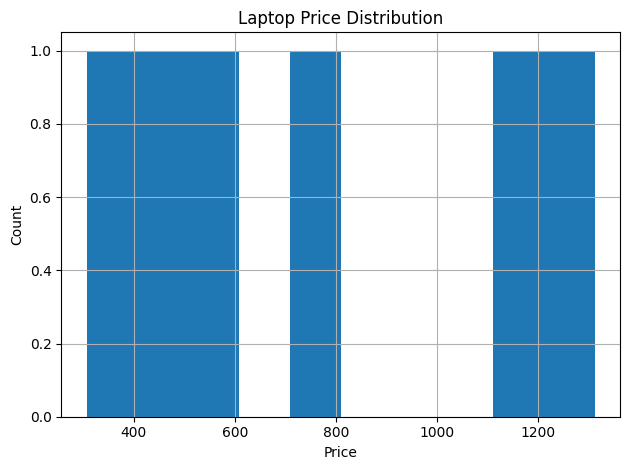

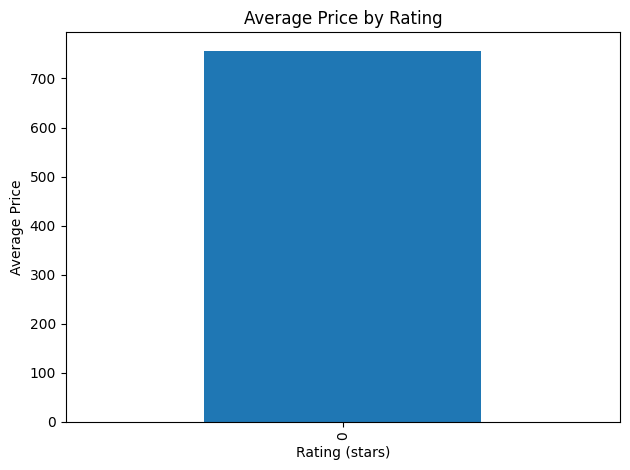

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Scrape data
def scrape_laptops():
    url = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops"
    resp = requests.get(url)
    resp.raise_for_status()

    soup = BeautifulSoup(resp.text, "html.parser")
    product_cards = soup.select("div.col-md-4.col-xl-4 div.card.thumbnail")

    rows = []

    for card in tqdm(product_cards, desc="Scraping products"):
        title_tag = card.select_one("a.title")
        title = title_tag.get_text(strip=True) if title_tag else None

        price_tag = card.select_one("h4.pull-right.price")
        price_raw = price_tag.get_text(strip=True) if price_tag else None

        description_tag = card.select_one("p.description")
        description = description_tag.get_text(strip=True) if description_tag else None

        reviews_tag = card.select_one("p.pull-right")
        reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else None

        rating_stars = card.select("span.glyphicon.glyphicon-star")
        rating = len(rating_stars)

        rows.append({
            "title": title,
            "price_raw": price_raw,
            "description": description,
            "reviews_text": reviews_text,
            "rating": rating
        })

    df = pd.DataFrame(rows)
    return df

# 2. Clean and engineer features
def clean_laptops(df: pd.DataFrame) -> pd.DataFrame:
    # Clean price: remove '$' and convert to float
    df["price"] = (
        df["price_raw"]
        .str.replace("$", "", regex=False)
        .astype(float)
    )

    # Extract number of reviews from text, e.g. "5 reviews" -> 5
    df["reviews_count"] = (
        df["reviews_text"]
        .str.extract(r"(\d+)", expand=False)
        .astype(float)
    )



    return df

# 3. Basic EDA (quick checks and simple plots)
def run_eda(df: pd.DataFrame):
    print("\n=== HEAD ===")
    print(df.head())

    print("\n=== SUMMARY ===")
    print(df.describe(include="all"))

    # Price distribution
    plt.figure()
    df["price"].hist(bins=10)
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.title("Laptop Price Distribution")
    plt.tight_layout()
    print("Saved: data/price_distribution.png")

    # Rating vs avg price
    avg_price_by_rating = df.groupby("rating")["price"].mean()
    plt.figure()
    avg_price_by_rating.plot(kind="bar")
    plt.xlabel("Rating (stars)")
    plt.ylabel("Average Price")
    plt.title("Average Price by Rating")
    plt.tight_layout()
    print("Saved: data/avg_price_by_rating.png")


def main():
    # Scrape
    raw_df = scrape_laptops()
    raw_df.to_csv("raw_laptops.csv", index=False)
    print("Saved raw data to data/raw_laptops.csv")

    # Clean
    clean_df = clean_laptops(raw_df)
    clean_df.to_csv("cleaned_laptops.csv", index=False)
    print("Saved cleaned data to data/cleaned_laptops.csv")

    # EDA
    run_eda(clean_df)


if __name__ == "__main__":
    main()
